A) plotting data

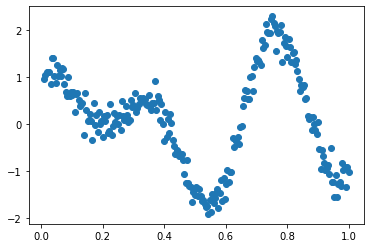

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('p1_dataset/data1_Signal.csv')
x, y = df['x'], df['y']

plt.scatter(x, y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

B) fitting a diagram using gradient decent

In [181]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

class regression:
    def __init__(self, degree: int, learning_rate: float):
        self.degree = degree
        self.learning_rate = learning_rate
        # plus 1 is for considering bias
        self.coefficients = np.random.random(degree + 1)
    
    # In a general form features should be a list of features
    def train_gradient_descent(self, x: np.array, y: np.array, iteration: int):
        x = x.reshape(len(x), 1)
        for i in range(self.degree-1):
            x = np.c_[x, np.multiply(x[:, 0], x[:, i])]
            
            
        x = np.c_[np.ones(len(x)), x]
        
        for i in range(iteration):
            self.gradient_descent(x, y)
    
    def gradient_descent(self, x, y):
        m = len(x)
        prediction = x.dot(self.coefficients)
        self.coefficients -= self.learning_rate * 1/m * (x.T.dot(prediction - y))
    
    def predict(self, x):
        x = x.reshape(len(x), 1)
        for i in range(self.degree-1):
            x = np.c_[x, np.multiply(x[:, 0], x[:, i])]   
            
        x = np.c_[np.ones(len(x)), x]
        
        return x.dot(self.coefficients)
    
    def normal_equation():
        
    
    def track_learning(self, X_train, X_test, y_train, y_test, iteration: int, step: int):
        steps = np.array([0])
        train_error_mse = np.array([])
        test_error_mse = np.array([])
        
        train_error_mae = np.array([])
        test_error_mae = np.array([])
        
        train_error_rmse = np.array([])
        test_error_rmse = np.array([])
        
        while iteration > step:
            self.train_gradient_descent(X_train, y_train, step)
            
            steps = np.append(steps, steps[len(steps) - 1] + step)
            
            y_train_predicted = self.predict(X_train)
            train_error_mse = np.append(train_error_mse, mean_squared_error(y_train, y_train_predicted))
            train_error_mae = np.append(train_error_mae, mean_absolute_error(y_train, y_train_predicted))
            train_error_rmse = np.append(train_error_rmse, sqrt(mean_squared_error(y_train, y_train_predicted)))  
            
            y_test_predicted = self.predict(X_test)
            test_error_mse = np.append(test_error_mse, mean_squared_error(y_test, y_test_predicted))
            test_error_mae = np.append(test_error_mae, mean_absolute_error(y_test, y_test_predicted))
            test_error_rmse = np.append(test_error_rmse, sqrt(mean_squared_error(y_test, y_test_predicted)))
                                         
            iteration -= step
            
        self.train_gradient_descent(X_train, y_train, iteration)
        
        y_train_predicted = self.predict(X_train)
        train_error_mse = np.append(train_error_mse, mean_squared_error(y_train, y_train_predicted))
        train_error_mae = np.append(train_error_mae, mean_absolute_error(y_train, y_train_predicted))
        train_error_rmse = np.append(train_error_rmse, sqrt(mean_squared_error(y_train, y_train_predicted)))
                                     
        y_test_predicted = self.predict(X_test)
        test_error_mse = np.append(test_error_mse, mean_squared_error(y_test, y_test_predicted))
        test_error_mae = np.append(test_error_mae, mean_absolute_error(y_test, y_test_predicted))
        test_error_rmse = np.append(test_error_rmse, sqrt(mean_squared_error(y_test, y_test_predicted)))
                                    
        plt.scatter(steps, train_error_mse, c='blue')
        plt.scatter(steps, test_error_mse, c='red')
        plt.title('mean squared error')
        plt.xlabel('steps')
        plt.ylabel('error')
        plt.show()
        
        plt.scatter(steps, train_error_mae, c='blue')
        plt.scatter(steps, test_error_mae, c='red')
        plt.title('mean absolute error')
        plt.xlabel('steps')
        plt.ylabel('error')
        plt.show()
                                    
        plt.scatter(steps, train_error_rmse, c='blue')
        plt.scatter(steps, test_error_rmse, c='red')
        plt.title('root mean squared error')
        plt.xlabel('steps')
        plt.ylabel('error')
        plt.show()

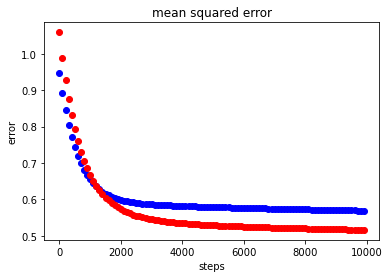

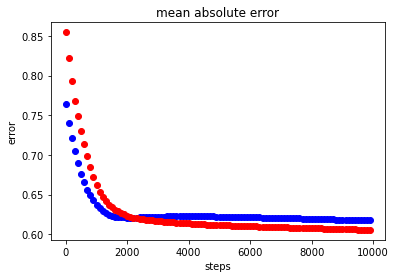

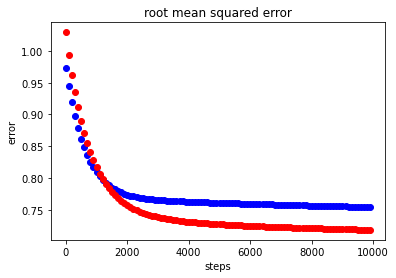

None


In [182]:
reg = regression(7, 0.6)
# reg.train_gradient_descent(np.array(X_train), np.array(y_train), 1000)
print(reg.track_learning(np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test), 10000, 100))

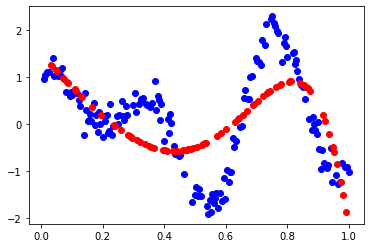

In [153]:
new_reg = regression(7, 0.6)
new_reg.train_gradient_descent(np.array(X_train), np.array(y_train), 10000)
plt.scatter(X_train, y_train, c='blue')
plt.scatter(X_test, new_reg.predict(np.array(X_test)), c='red')
plt.show()